# XOR table

|Input A|Input B| A $\oplus$ B|
|:-----:|:-----:|:-----:|
|0|0|1|
|0|1|1|
|1|0|1|
|1|1|0|

# XOR table derived using only NAND

## NAND Gate

|Input A|Input B| $\overline{\mbox{A $\land$ B}}$|
|:-----:|:-----:|:-----:|
|0|0|1|
|0|1|1|
|1|0|1|
|1|1|0|

## Gate Implementation of using NAND Gates to implement XOR (from CS background)

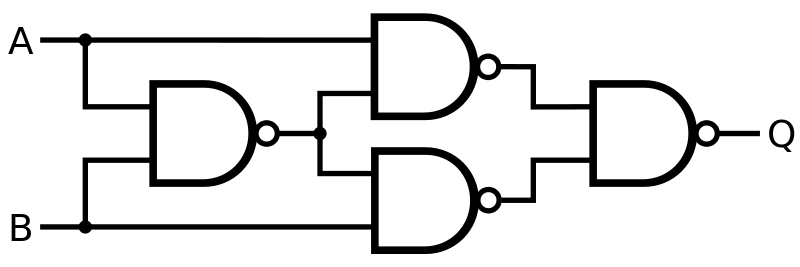


In other words, its finding nand between the two inputs, each of the inputs with nand of those inputs, and finally nand of the last two results.

## Finding Weights for Implementing NAND

If we assume our threshold T is 0, bias b is 1, then we need to find weights based on our inputs.

Our weights need to be equal since we don't have a difference as to which position or port the inputs are placed in (eg: it does not affect us in any way if the input is (1,0) or (0,1).

So first let's take cases with output result and check which weights would work for obtaining this result (refer to NAND table above):

1) If A = 0 and B = 0, our output needs to be 1.

- 0*w + 0*w + b >= 0

2) If A = 0 and B = 1, our output needs to be 1.

- 0*w + 1*w + b >= 0

3) If A = 1 and B = 0, our output needs to be 1.

- 1*w + 0*w + b >= 0

4) If A = 1 and B = 1, our output needs to be 0.

- 1*w + 1*w + b < 0

Let's combine and simplify these equations together:

- b > 0
- w + b >= 0
- w + b >= 0
- 2w + b < 0

Since b = 1, let us pick w = -1 to satify all the conditions above.


In [ ]:
import numpy as np
import logging

debug = False
bias = 1

if (debug):
    logging.basicConfig(level=logging.DEBUG)

def nand(inp, w = np.array([-1,-1,1]), T = 0):
    return 1 if (inp @ w) >= T else 0
    
def xor(inp):
    logging.debug("xor: starting now")
    
    abNand = nand(inp) # nand with tuple given
    logging.debug("xor: nand with given input tuple values %d", abNand)
    
    anandNand = nand(np.array([inp[0], abNand, inp[2]])) # nand with first value of tuple and result of previous ab nand
    logging.debug("xor: nand with given input tuple values %d", anandNand)

    bnandNand = nand(np.array([inp[1], abNand, inp[2]])) # nand with second value of tuple and result of previous ab nand
    logging.debug("xor: nand with given input tuple values %d", bnandNand)

    return nand(np.array([anandNand, bnandNand, inp[2]])) # nand with previous two results
    
    
def main():
    a = None
    b = None
    quit = False
    ready = False
    while(True):
        try:
            a = input("enter each element of tuple followed by space or press q to quit")
            if (a == "q"): break
            a = list(map(int, a.split()))
            if (len(a) != 2 or (a[0] not in [0,1]) or (a[1] not in [0,1])):
                print("Sorry, the inputs are not valid. Note that due to default implementation of gates")
                print("the inputs have to be from [0,1]. Please enter two inputs from [0,1].")
                ready = False
            else:
                ready = True
        except ValueError:
            print("sorry the inputs are not valid. Due to nature of XOR binary operation, only integers are allowed")
            ready = False
            
        if ((not quit) and ready):
            a.append(bias) # bias value added
            answer = xor(np.array(a))
            print(answer)

main()

enter each element of tuple followed by space or press q to quit1 0
1


# Single-layer vs Multi-layer Perceptron

XOR cannot be built with one layer, because conceptually, single-layer perceptrons can only show linearly separable patterns

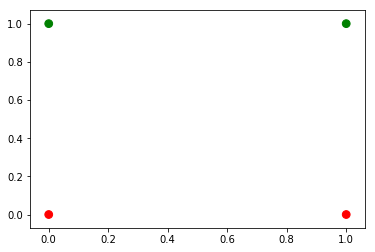

In [3]:
#from notebook
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as p
cs = ["#ff0000","#ff0000","#008000","#008000"]
p.scatter([0, 1, 0, 1],[0,0,1,1],color=cs,s = 60)

A single-layer perceptron can implement this because geometrically, a linear line can categorize the points into two categories. However, if we note the points below:

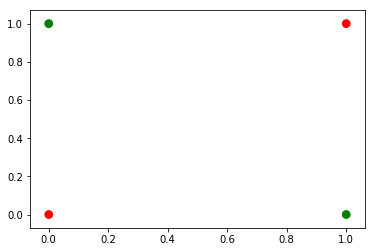

In [2]:
#from notebook
import matplotlib 
import matplotlib.pyplot as p
cs = ["#ff0000", "#008000",  "#008000", "#ff0000"]
p.scatter([0, 1, 0, 1],[0,0,1,1],color=cs,s = 60)

A single line cannot split the points into two categories here (we would need two lines, hence another hidden layer, to implement this). 
Thus, more layers would be needed for more complex networks.
In terms of deep networks, this might have to do with how artificial intelligence can actually process information beyond the simple one-layer processes to complex multi-layer applications. 